In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [2]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 9 class
predictions = Dense(9, activation='softmax')(x)

In [4]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [7]:
# model.summary()

### prepare data for model input

In [8]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [9]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
train_generator = train_datagen.flow_from_directory(
        'F:/abuzar/data/raw_data',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size)

Found 65 images belonging to 9 classes.


In [11]:
model.fit_generator(train_generator, epochs=5, steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 61s - loss: 8.0416    
Epoch 2/5
10/10 [==============================] - 66s - loss: 4.5478    
Epoch 3/5
10/10 [==============================] - 69s - loss: 2.5533    
Epoch 4/5
10/10 [==============================] - 73s - loss: 2.9562    
Epoch 5/5
10/10 [==============================] - 66s - loss: 2.4776    


## Get prediction with new model

In [12]:
# from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [21]:
# Image Preprocessing
img_path = 'F:/abuzar/data/raw_data/Hamza/2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [26]:
x = x/255.0

In [27]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])

In [28]:
print(preds.shape)
preds

(1, 9)


array([[  3.60005083e-06,   2.13781150e-05,   3.98193952e-05,
          2.23564416e-06,   5.29154498e-08,   2.06758364e-06,
          8.41632300e-06,   1.12519615e-06,   9.99921322e-01]], dtype=float32)

In [20]:
model.predict?

In [23]:
import matplotlib.pyplot as plt

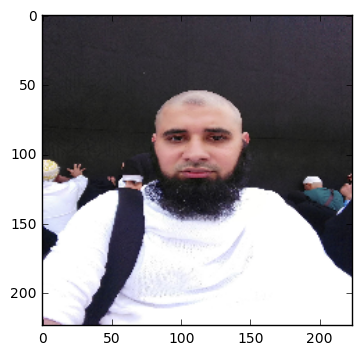

In [32]:
plt.imshow(image.img_to_array(img)/255.0)
plt.show()